# The problem 
An ant leaves its anthill in order to forage for food. It moves with the speed of 10cm per second, but it doesn't know where to go, therefore every second it moves randomly 10cm directly north, south, east or west with equal probability.

1. If the food is located on east-west lines 20cm to the north and 20cm to the south, as well as on north-south lines 20cm to the east and 20cm to the west from the anthill, how long will it take the ant to reach it on average?

2. What is the average time the ant will reach food if it is located only on a diagonal line passing through (10cm, 0cm) and (0cm, 10cm) points?

3. Can you write a program that comes up with an estimate of average time to find food for any closed boundary around the anthill? What would be the answer if food is located outside an defined by $((x – 2.5cm) / 30cm )^{2} + ( (y – 2.5cm) / 40cm )^{2} < 1$ in coordinate system where the anthill is located at (x = 0cm, y = 0cm)?



# Random Walk Background
## One Dimension
### Expectation and Variance
Consider the ant is moving along a straight line (e.g. the x axis). At each time step the ant either moves in the positive or negative x direction with equal probability.
Considering just the first timestep $t^{0}$ it is easy to see that the expectation of the position at $t^{1}$ is given by $E(x^{1} = x_{i}) = \sum_{i}^{1} x_i p_i = 0$, where $x_i \in {-1, +1}$ and $p_0 = p_1 = 0.5$. Similarly it can be shown that $var(x^{1}) = 1, \implies \sigma(x^{1}) = 1$.
Now generalising to the nth timestep we have that $E(x^{n}) = \sum_{j=0}^{n} E(x^{j}) = 0$. Using the definition of variance: $var(x) = E(x^{2}) - E(x)^2$ we can see that $var(x^{n}) = n \implies \sigma(x^{n}) = \sqrt{n}$.
Now let's consider the one dimensional analogue to our two dimensional problem, what is the expectated number of timesteps for our ant to reach either +20cm or -20 cm? Clearly for reaching +/- 10cm this always happens on the first timestep. 

In [27]:
from numpy.random import default_rng
import matplotlib.pyplot as plt


class Ant:
    def __init__(self) -> None:
        self.x: int = 0
        self.y: int = 0
        self.rng = default_rng()

    def move(self) -> None:
        move = self.rng.choice(["N", "E", "S", "W"])
        if move == "N":
            self.y += 10
        if move == "S":
            self.y -= 10
        if move == "E":
            self.x += 10
        if move == "W":
            self.x -= 10

    def at_food(self) -> bool:
        return (abs(self.x) >= 20) or (abs(self.y) >= 20)

    def time_to_food(self) -> int:
        seconds = 0
        while not self.at_food():
            seconds += 1
            self.move()
        self.reset_coords()
        return seconds

    def reset_coords(self) -> None:
        self.x = 0
        self.y = 0

    def plot_walk(self) -> None:
        points = [(0, 0)]
        seconds = 0
        while not self.at_food():
            seconds += 1
            self.move()
            points.append((self.x, self.y))
        plt.plot([p[0] for p in points], [p[1] for p in points])
        plt.suptitle(f"{seconds=}")
        self.reset_coords()

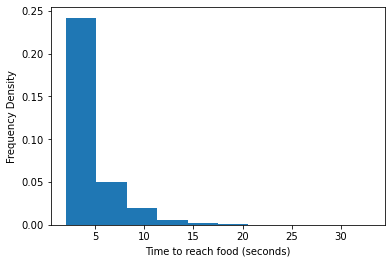

In [28]:
import numpy as np

ant = Ant()
num_repeats = int(1e5)

times = np.array([ant.time_to_food() for _ in range(num_repeats)])
plt.hist(times, density=True)
plt.xlabel("Time to reach food (seconds)")
plt.ylabel("Frequency Density")
plt.show()

In [29]:
mean = np.mean(times)
variance = np.sum((times - mean) ** 2) / num_repeats
stdev = np.sqrt(variance)

print(f"{mean=:.3f}\n{variance=:.3f}\n{stdev=:.3f}")

mean=4.498
variance=8.247
stdev=2.872
